In [1]:
#install tenserflow
!pip install --upgrade tensorflow

You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:
# Install all the required libraries and import them
!pip install plotly
!pip install pandas
!pip install --upgrade nbformat
!pip install nltk
!pip install spacy 
!pip install WordCloud
!pip install gensim 
!pip install jupyterthemes
!pip install fsspec
import nltk
nltk.download('punkt')

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional
from tensorflow.keras.models import Model

You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.
ERROR: Invalid requirement: '#'
You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.
ERROR: Invalid requirement: '#'
You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\zende\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.


from nltk import word_tokenize

In [5]:
# Load the dataset
df = pd.read_csv('C://Astle//Dissertation//WELFake_Dataset.csv')
df.count()

Unnamed: 0    72134
title         71576
text          72095
label         72134
dtype: int64

In [6]:
#display the top 5 rows in the dataset
df.head(5)

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [7]:
#display the dimensions of the dataset which is in the form of csv file
df.shape

(72134, 4)

In [8]:
#remove the unnamed serial number column which is not required
df = df.loc[:,  ~df.columns.str.contains('^Unnamed')]

In [9]:
#Count the number of fake and real labels in the dataset
label_count = df.value_counts('label')
print(label_count)

label
1    37106
0    35028
dtype: int64


In [10]:
#print the sum of the null values present in the dataset
print(df.isnull().sum())

title    558
text      39
label      0
dtype: int64


In [11]:
#drop the null values 
df = df.dropna()

In [12]:
#reconfirm the removed null values
print(df.isnull().sum())

title    0
text     0
label    0
dtype: int64


In [13]:
#print the duplicate values in the dataset
print(df.duplicated())

0        False
2        False
3        False
4        False
5        False
         ...  
72129    False
72130    False
72131    False
72132    False
72133     True
Length: 71537, dtype: bool


In [14]:
#display the sum of the duplicated values in the dataset
df.duplicated().sum()

8416

In [15]:
#print the number duplicated values as well as the number of non-duplicated values
print(df.duplicated().value_counts())

False    63121
True      8416
dtype: int64


In [16]:
#remove the duplicated values present in the dataset
df = df.drop_duplicates()

In [17]:
#reconfirm whether the duplicated values are removed succesfully by displaying the sum of the duplicated values
df.duplicated().sum()

0

In [18]:
#Again check the dimensions of the dataset(i.e. csv file)
df.shape

(63121, 3)

In [19]:
import re
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize


In [20]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\zende\AppData\Roaming\nltk_data...


True

In [21]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\zende\AppData\Roaming\nltk_data...


True

In [22]:
#Remove punctuations
from gensim.parsing.preprocessing import STOPWORDS
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
import string as st

In [23]:
def remove_punct(text):
    return ("".join([ch for ch in text if ch not in st.punctuation]))

In [24]:
df['removed_punc'] = df['text'].apply(lambda x: remove_punct(x))
df.head()

,title,text,label,removed_punc
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,No comment is expected from Barack Obama Membe...
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,Now most of the demonstrators gathered last n...
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,A dozen politically active pastors came here f...
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,The RS28 Sarmat missile dubbed Satan 2 will re...
5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1,All we can say on this one is it s about time ...


In [25]:
def tokenize(text):
    text = re.split('\s+' ,text)
    return [x.lower() for x in text]

In [26]:
# Tokenize
df['tokens'] = df['removed_punc'].apply(lambda msg : tokenize(msg))
df.head()

,title,text,label,removed_punc,tokens
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,No comment is expected from Barack Obama Membe...,"[no, comment, is, expected, from, barack, obam..."
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,Now most of the demonstrators gathered last n...,"[, now, most, of, the, demonstrators, gathered..."
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,A dozen politically active pastors came here f...,"[a, dozen, politically, active, pastors, came,..."
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,The RS28 Sarmat missile dubbed Satan 2 will re...,"[the, rs28, sarmat, missile, dubbed, satan, 2,..."
5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1,All we can say on this one is it s about time ...,"[all, we, can, say, on, this, one, is, it, s, ..."


In [27]:
# Remove tokens of length less than 3
def remove_small_words(text):
    return [x for x in text if len(x) > 3 ]

In [28]:
df['filtered_tokens'] = df['tokens'].apply(lambda x : remove_small_words(x))
df.head()

,title,text,label,removed_punc,tokens,filtered_tokens
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,No comment is expected from Barack Obama Membe...,"[no, comment, is, expected, from, barack, obam...","[comment, expected, from, barack, obama, membe..."
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,Now most of the demonstrators gathered last n...,"[, now, most, of, the, demonstrators, gathered...","[most, demonstrators, gathered, last, night, w..."
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,A dozen politically active pastors came here f...,"[a, dozen, politically, active, pastors, came,...","[dozen, politically, active, pastors, came, he..."
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,The RS28 Sarmat missile dubbed Satan 2 will re...,"[the, rs28, sarmat, missile, dubbed, satan, 2,...","[rs28, sarmat, missile, dubbed, satan, will, r..."
5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1,All we can say on this one is it s about time ...,"[all, we, can, say, on, this, one, is, it, s, ...","[this, about, time, someone, sued, southern, p..."


In [29]:
#Remove stopwords
def remove_stopwords(text):
    return [word for word in text if word not in nltk.corpus.stopwords.words('english')]

In [30]:
df['clean_tokens'] = df['filtered_tokens'].apply(lambda x : remove_stopwords(x))
df.head()

,title,text,label,removed_punc,tokens,filtered_tokens,clean_tokens
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,No comment is expected from Barack Obama Membe...,"[no, comment, is, expected, from, barack, obam...","[comment, expected, from, barack, obama, membe...","[comment, expected, barack, obama, members, fy..."
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,Now most of the demonstrators gathered last n...,"[, now, most, of, the, demonstrators, gathered...","[most, demonstrators, gathered, last, night, w...","[demonstrators, gathered, last, night, exercis..."
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,A dozen politically active pastors came here f...,"[a, dozen, politically, active, pastors, came,...","[dozen, politically, active, pastors, came, he...","[dozen, politically, active, pastors, came, pr..."
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,The RS28 Sarmat missile dubbed Satan 2 will re...,"[the, rs28, sarmat, missile, dubbed, satan, 2,...","[rs28, sarmat, missile, dubbed, satan, will, r...","[rs28, sarmat, missile, dubbed, satan, replace..."
5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1,All we can say on this one is it s about time ...,"[all, we, can, say, on, this, one, is, it, s, ...","[this, about, time, someone, sued, southern, p...","[time, someone, sued, southern, poverty, cente..."


In [31]:
# Apply lemmatization on tokens
def lemmatize(text):
    word_net = WordNetLemmatizer()
    return [word_net.lemmatize(word) for word in text]

In [32]:
df['lemma_words'] = df['clean_tokens'].apply(lambda x : lemmatize(x))
df.head()

,title,text,label,removed_punc,tokens,filtered_tokens,clean_tokens,lemma_words
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,No comment is expected from Barack Obama Membe...,"[no, comment, is, expected, from, barack, obam...","[comment, expected, from, barack, obama, membe...","[comment, expected, barack, obama, members, fy...","[comment, expected, barack, obama, member, fyf..."
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,Now most of the demonstrators gathered last n...,"[, now, most, of, the, demonstrators, gathered...","[most, demonstrators, gathered, last, night, w...","[demonstrators, gathered, last, night, exercis...","[demonstrator, gathered, last, night, exercisi..."
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,A dozen politically active pastors came here f...,"[a, dozen, politically, active, pastors, came,...","[dozen, politically, active, pastors, came, he...","[dozen, politically, active, pastors, came, pr...","[dozen, politically, active, pastor, came, pri..."
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,The RS28 Sarmat missile dubbed Satan 2 will re...,"[the, rs28, sarmat, missile, dubbed, satan, 2,...","[rs28, sarmat, missile, dubbed, satan, will, r...","[rs28, sarmat, missile, dubbed, satan, replace...","[rs28, sarmat, missile, dubbed, satan, replace..."
5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1,All we can say on this one is it s about time ...,"[all, we, can, say, on, this, one, is, it, s, ...","[this, about, time, someone, sued, southern, p...","[time, someone, sued, southern, poverty, cente...","[time, someone, sued, southern, poverty, cente..."


In [33]:
# Display the clean column
def return_sentences(tokens):
    return " ".join([word for word in tokens])

In [34]:
df['clean'] = df['lemma_words'].apply(lambda x : return_sentences(x))
df.head()

,title,text,label,removed_punc,tokens,filtered_tokens,clean_tokens,lemma_words,clean
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,No comment is expected from Barack Obama Membe...,"[no, comment, is, expected, from, barack, obam...","[comment, expected, from, barack, obama, membe...","[comment, expected, barack, obama, members, fy...","[comment, expected, barack, obama, member, fyf...",comment expected barack obama member fyf911 fu...
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,Now most of the demonstrators gathered last n...,"[, now, most, of, the, demonstrators, gathered...","[most, demonstrators, gathered, last, night, w...","[demonstrators, gathered, last, night, exercis...","[demonstrator, gathered, last, night, exercisi...",demonstrator gathered last night exercising co...
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,A dozen politically active pastors came here f...,"[a, dozen, politically, active, pastors, came,...","[dozen, politically, active, pastors, came, he...","[dozen, politically, active, pastors, came, pr...","[dozen, politically, active, pastor, came, pri...",dozen politically active pastor came private d...
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,The RS28 Sarmat missile dubbed Satan 2 will re...,"[the, rs28, sarmat, missile, dubbed, satan, 2,...","[rs28, sarmat, missile, dubbed, satan, will, r...","[rs28, sarmat, missile, dubbed, satan, replace...","[rs28, sarmat, missile, dubbed, satan, replace...",rs28 sarmat missile dubbed satan replace ss18 ...
5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1,All we can say on this one is it s about time ...,"[all, we, can, say, on, this, one, is, it, s, ...","[this, about, time, someone, sued, southern, p...","[time, someone, sued, southern, poverty, cente...","[time, someone, sued, southern, poverty, cente...",time someone sued southern poverty centeron tu...


In [35]:
# Display the dataframe
df

,title,text,label,removed_punc,tokens,filtered_tokens,clean_tokens,lemma_words,clean
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,No comment is expected from Barack Obama Membe...,"[no, comment, is, expected, from, barack, obam...","[comment, expected, from, barack, obama, membe...","[comment, expected, barack, obama, members, fy...","[comment, expected, barack, obama, member, fyf...",comment expected barack obama member fyf911 fu...
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,Now most of the demonstrators gathered last n...,"[, now, most, of, the, demonstrators, gathered...","[most, demonstrators, gathered, last, night, w...","[demonstrators, gathered, last, night, exercis...","[demonstrator, gathered, last, night, exercisi...",demonstrator gathered last night exercising co...
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,A dozen politically active pastors came here f...,"[a, dozen, politically, active, pastors, came,...","[dozen, politically, active, pastors, came, he...","[dozen, politically, active, pastors, came, pr...","[dozen, politically, active, pastor, came, pri...",dozen politically active pastor came private d...
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,The RS28 Sarmat missile dubbed Satan 2 will re...,"[the, rs28, sarmat, missile, dubbed, satan, 2,...","[rs28, sarmat, missile, dubbed, satan, will, r...","[rs28, sarmat, missile, dubbed, satan, replace...","[rs28, sarmat, missile, dubbed, satan, replace...",rs28 sarmat missile dubbed satan replace ss18 ...
5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1,All we can say on this one is it s about time ...,"[all, we, can, say, on, this, one, is, it, s, ...","[this, about, time, someone, sued, southern, p...","[time, someone, sued, southern, poverty, cente...","[time, someone, sued, southern, poverty, cente...",time someone sued southern poverty centeron tu...
...,...,...,...,...,...,...,...,...,...
72127,WIKILEAKS EMAIL SHOWS CLINTON FOUNDATION FUNDS...,An email released by WikiLeaks on Sunday appea...,1,An email released by WikiLeaks on Sunday appea...,"[an, email, released, by, wikileaks, on, sunda...","[email, released, wikileaks, sunday, appears, ...","[email, released, wikileaks, sunday, appears, ...","[email, released, wikileaks, sunday, appears, ...",email released wikileaks sunday appears show f...
72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0,WASHINGTON Reuters Hackers believed to be wor...,"[washington, reuters, hackers, believed, to, b...","[washington, reuters, hackers, believed, worki...","[washington, reuters, hackers, believed, worki...","[washington, reuters, hacker, believed, workin...",washington reuters hacker believed working rus...
72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1,You know because in fantasyland Republicans ne...,"[you, know, because, in, fantasyland, republic...","[know, because, fantasyland, republicans, neve...","[know, fantasyland, republicans, never, questi...","[know, fantasyland, republican, never, questio...",know fantasyland republican never questioned c...
72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0,Migrants Refuse To Leave Train At Refugee Camp...,"[migrants, refuse, to, leave, train, at, refug...","[migrants, refuse, leave, train, refugee, camp...","[migrants, refuse, leave, train, refugee, camp...","[migrant, refuse, leave, train, refugee, camp,...",migrant refuse leave train refugee camp hungar...


In [37]:
# remove the unnamed serial number column which is not required
df = df.loc[:,  ~df.columns.str.contains('^removed_punc')]

In [38]:
# remove the unnamed serial number column which is not required
df = df.loc[:,  ~df.columns.str.contains('^tokens')]

In [39]:
df = df.loc[:,  ~df.columns.str.contains('^filtered_tokens')]

In [40]:
df = df.loc[:,  ~df.columns.str.contains('^clean_tokens')]

In [41]:
df = df.loc[:,  ~df.columns.str.contains('^clean_text')]

In [42]:
df

,title,text,label,lemma_words,clean
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,"[comment, expected, barack, obama, member, fyf...",comment expected barack obama member fyf911 fu...
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,"[demonstrator, gathered, last, night, exercisi...",demonstrator gathered last night exercising co...
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,"[dozen, politically, active, pastor, came, pri...",dozen politically active pastor came private d...
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,"[rs28, sarmat, missile, dubbed, satan, replace...",rs28 sarmat missile dubbed satan replace ss18 ...
5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1,"[time, someone, sued, southern, poverty, cente...",time someone sued southern poverty centeron tu...
...,...,...,...,...,...
72127,WIKILEAKS EMAIL SHOWS CLINTON FOUNDATION FUNDS...,An email released by WikiLeaks on Sunday appea...,1,"[email, released, wikileaks, sunday, appears, ...",email released wikileaks sunday appears show f...
72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0,"[washington, reuters, hacker, believed, workin...",washington reuters hacker believed working rus...
72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1,"[know, fantasyland, republican, never, questio...",know fantasyland republican never questioned c...
72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0,"[migrant, refuse, leave, train, refugee, camp,...",migrant refuse leave train refugee camp hungar...


In [43]:
# Obtain the total words present in the dataset
list_of_words = []
for i in df.lemma_words:
    for j in i:
        list_of_words.append(j)

In [44]:
len(list_of_words)

18125309

In [45]:
# Get the total number of words from the list_of_words
total_words = len(list(set(list_of_words)))
total_words

422968

In [47]:
x = df['clean']
y = df['label']

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [51]:
# Create Tokenizer
tokenizer = Tokenizer(num_words = total_words)
tokenizer.fit_on_texts(x_train)
train_sequences = tokenizer.texts_to_sequences(x_train)
test_sequences = tokenizer.texts_to_sequences(x_test)

In [52]:
len(train_sequences)

44184

In [53]:
len(test_sequences)

18937

In [54]:
# Add padding
padded_train = pad_sequences(train_sequences,maxlen = 40, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_sequences,maxlen = 40, padding = 'post', truncating = 'post') 

In [55]:
for i,doc in enumerate(padded_train[:2]):
     print("The padded encoding for document",i+1," is : ",doc)

The padded encoding for document 1  is :  [   113    786     10   1543  19549   3323   1450  32047   9560   4684
      3    123 137499    113    786   4959  13960     31   3437    311
    272      3   6454  19549  19550    354     93   1399     94   2346
     54   1399   6976   3160    477   9072   3286  19850  77568   6180]
The padded encoding for document 2  is :  [  3361    335    424   8051    299   1208    119   7244   3205     10
  10544   1922    335   4373   1629    447  10210     21      2  14703
     24     28    910    858    335 137504  29884      2    323    302
    728  12617    382   1690    686 137505  12930  26534   2288    104]


In [58]:
from keras.layers import Dropout

In [59]:
# Create model for LSTM
embedding_vector_features=40
model=Sequential()
model.add(Embedding(total_words,embedding_vector_features,input_length=40))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 40, 40)            16918720  
                                                                 
 dropout (Dropout)           (None, 40, 40)            0         
                                                                 
 lstm (LSTM)                 (None, 100)               56400     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 16,975,221
Trainable params: 16,975,221
Non-trainable params: 0
_________________________________________________________________
None


In [60]:
y_train = np.asarray(y_train)

In [61]:
# train the model
model.fit(padded_train, y_train, batch_size = 64, validation_split = 0.1, epochs = 11)

Epoch 1/11
622/622 [==============================] - 65s 103ms/step - loss: 0.2603 - accuracy: 0.8877 - val_loss: 0.2103 - val_accuracy: 0.9160
Epoch 2/11
622/622 [==============================] - 62s 99ms/step - loss: 0.1080 - accuracy: 0.9615 - val_loss: 0.2434 - val_accuracy: 0.9199
Epoch 3/11
622/622 [==============================] - 61s 97ms/step - loss: 0.0528 - accuracy: 0.9830 - val_loss: 0.2460 - val_accuracy: 0.9095
Epoch 4/11
622/622 [==============================] - 63s 101ms/step - loss: 0.0297 - accuracy: 0.9914 - val_loss: 0.4123 - val_accuracy: 0.9034
Epoch 5/11
622/622 [==============================] - 63s 101ms/step - loss: 0.0196 - accuracy: 0.9942 - val_loss: 0.5593 - val_accuracy: 0.9065
Epoch 6/11
622/622 [==============================] - 62s 100ms/step - loss: 0.0166 - accuracy: 0.9947 - val_loss: 0.3945 - val_accuracy: 0.9072
Epoch 7/11
622/622 [==============================] - 61s 98ms/step - loss: 0.0132 - accuracy: 0.9963 - val_loss: 0.3338 - val_accur

In [62]:
# do the prediction
pred = model.predict(padded_test)

592/592 [==============================] - 3s 4ms/step


In [63]:
# compute the predicted value
prediction = []
for i in range(len(pred)):
    if pred[i].item() > 0.5:
        prediction.append(1)
    else:
        prediction.append(0)

In [64]:
# getting the accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(list(y_test), prediction)

print("Model Accuracy : ", accuracy)

Model Accuracy :  0.9046839520515393


              precision    recall  f1-score   support

           0       0.91      0.92      0.91     10381
           1       0.90      0.89      0.89      8556

    accuracy                           0.90     18937
   macro avg       0.90      0.90      0.90     18937
weighted avg       0.90      0.90      0.90     18937



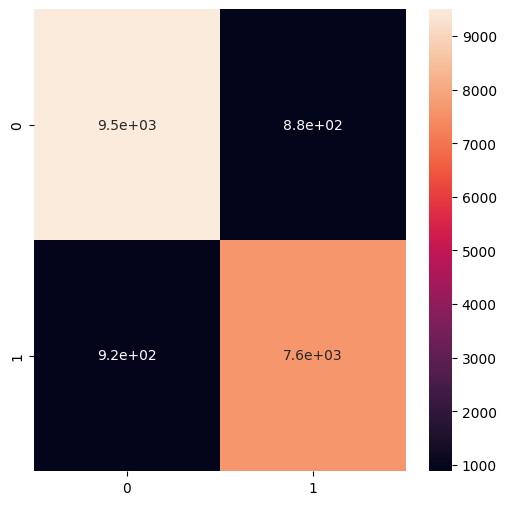

In [65]:
# generating the Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(list(y_test), prediction)
plt.figure(figsize = (6, 6))
sns.heatmap(cm, annot = True)

print(classification_report(y_test, prediction))

In [66]:
# Bidirectional LSTM
# Layers put in sequence
model = Sequential()

# embeddidng layer
model.add(Embedding(total_words, output_dim = 128))

# Bi-Directional LSTM
model.add(Bidirectional(LSTM(128))) # no of neurons

# Dense layers
model.add(Dense(128, activation = 'relu'))
model.add(Dense(1,activation= 'sigmoid')) # reason: we do binary classification here
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 128)         54139904  
                                                                 
 bidirectional (Bidirectiona  (None, 256)              263168    
 l)                                                              
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 54,436,097
Trainable params: 54,436,097
Non-trainable params: 0
_________________________________________________________________


In [67]:
y_train = np.asarray(y_train)

In [68]:
model.fit(padded_train, y_train, batch_size = 64, validation_split = 0.1, epochs = 11)

Epoch 1/11
622/622 [==============================] - 200s 318ms/step - loss: 0.2250 - acc: 0.9007 - val_loss: 0.1829 - val_acc: 0.9233
Epoch 2/11
622/622 [==============================] - 196s 315ms/step - loss: 0.0600 - acc: 0.9785 - val_loss: 0.2157 - val_acc: 0.9206
Epoch 3/11
622/622 [==============================] - 194s 311ms/step - loss: 0.0147 - acc: 0.9950 - val_loss: 0.3650 - val_acc: 0.9113
Epoch 4/11
622/622 [==============================] - 195s 313ms/step - loss: 0.0092 - acc: 0.9971 - val_loss: 0.3895 - val_acc: 0.9056
Epoch 5/11
622/622 [==============================] - 200s 322ms/step - loss: 0.0046 - acc: 0.9985 - val_loss: 0.4475 - val_acc: 0.9104
Epoch 6/11
622/622 [==============================] - 198s 319ms/step - loss: 0.0052 - acc: 0.9981 - val_loss: 0.4694 - val_acc: 0.9115
Epoch 7/11
622/622 [==============================] - 202s 324ms/step - loss: 0.0044 - acc: 0.9985 - val_loss: 0.4539 - val_acc: 0.9111
Epoch 8/11
622/622 [============================

In [69]:
# make prediction
pred = model.predict(padded_test)

592/592 [==============================] - 5s 9ms/step


In [70]:
prediction = []
for i in range(len(pred)):
    if pred[i].item() > 0.5:
        prediction.append(1)
    else:
        prediction.append(0)

In [71]:
# getting the accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(list(y_test), prediction)

print("Model Accuracy : ", accuracy)

Model Accuracy :  0.9071658657654328


              precision    recall  f1-score   support

           0       0.93      0.90      0.91     10381
           1       0.88      0.91      0.90      8556

    accuracy                           0.91     18937
   macro avg       0.91      0.91      0.91     18937
weighted avg       0.91      0.91      0.91     18937



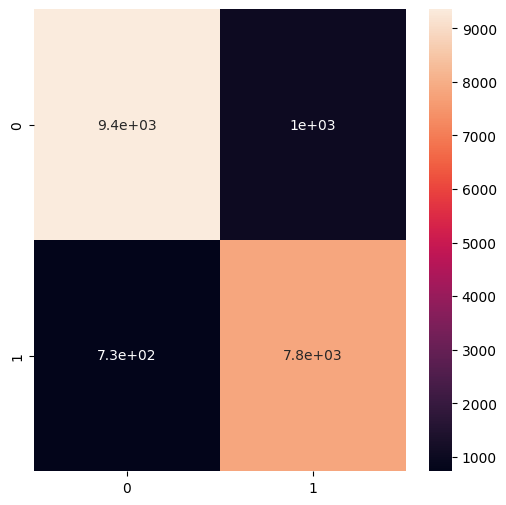

In [72]:
# Getting The Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(list(y_test), prediction)
plt.figure(figsize = (6, 6))
sns.heatmap(cm, annot = True)

print(classification_report(y_test, prediction))

In [79]:
# CNN-LSTM model
embedding_vector_features=40
model_cnn=Sequential()
model_cnn.add(Embedding(total_words, embedding_vector_features, input_length=40))

model_cnn.add(Dropout(0.3))

model_cnn.add(Conv1D(32, 5, activation='relu'))
model_cnn.add(MaxPool1D())

model_cnn.add(Conv1D(32, 5, activation='relu'))
model_cnn.add(MaxPool1D())

model_cnn.add(LSTM(100))
model_cnn.add(Dropout(0.3))

model_cnn.add(Dense(1,activation='sigmoid'))
model_cnn.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model_cnn.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 40, 40)            16918720  
                                                                 
 dropout_4 (Dropout)         (None, 40, 40)            0         
                                                                 
 conv1d_2 (Conv1D)           (None, 36, 32)            6432      
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 18, 32)           0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 14, 32)            5152      
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 7, 32)            0         
 1D)                                                  

In [80]:
model.fit(padded_train, y_train, batch_size = 64, validation_split = 0.1, epochs = 11)

Epoch 1/11
622/622 [==============================] - 207s 332ms/step - loss: 9.6996e-04 - acc: 0.9996 - val_loss: 0.8269 - val_acc: 0.8986
Epoch 2/11
622/622 [==============================] - 217s 349ms/step - loss: 0.0018 - acc: 0.9995 - val_loss: 0.6571 - val_acc: 0.9111
Epoch 3/11
622/622 [==============================] - 199s 321ms/step - loss: 2.2976e-04 - acc: 0.9999 - val_loss: 0.8305 - val_acc: 0.9059
Epoch 4/11
622/622 [==============================] - 204s 328ms/step - loss: 7.3482e-06 - acc: 1.0000 - val_loss: 0.7518 - val_acc: 0.9093
Epoch 5/11
622/622 [==============================] - 201s 324ms/step - loss: 1.2012e-06 - acc: 1.0000 - val_loss: 0.7606 - val_acc: 0.9104
Epoch 6/11
622/622 [==============================] - 203s 326ms/step - loss: 8.5310e-07 - acc: 1.0000 - val_loss: 0.7697 - val_acc: 0.9102
Epoch 7/11
622/622 [==============================] - 202s 325ms/step - loss: 6.2605e-07 - acc: 1.0000 - val_loss: 0.7791 - val_acc: 0.9104
Epoch 8/11
622/622 [====

In [75]:
# make prediction
pred = model.predict(padded_test)

592/592 [==============================] - 6s 10ms/step


In [76]:
# Compute prediction
prediction = []
for i in range(len(pred)):
    if pred[i].item() > 0.5:
        prediction.append(1)
    else:
        prediction.append(0)

In [77]:
# getting the accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(list(y_test), prediction)

print("Model Accuracy : ", accuracy)

Model Accuracy :  0.9035750118815018


              precision    recall  f1-score   support

           0       0.91      0.92      0.91     10381
           1       0.90      0.89      0.89      8556

    accuracy                           0.90     18937
   macro avg       0.90      0.90      0.90     18937
weighted avg       0.90      0.90      0.90     18937



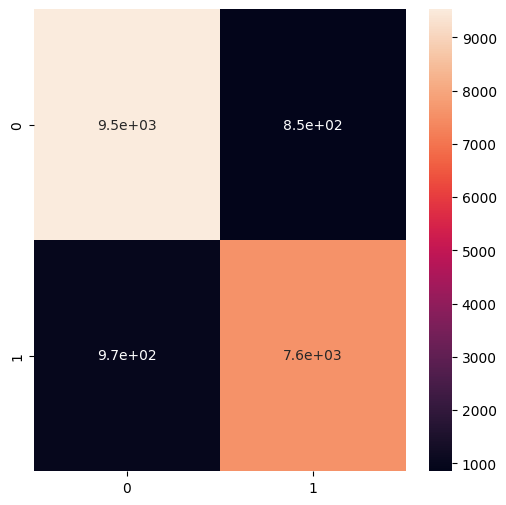

In [78]:
# Getting The Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(list(y_test), prediction)
plt.figure(figsize = (6, 6))
sns.heatmap(cm, annot = True)

print(classification_report(y_test, prediction))